In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 23.8MB/s]
100% 149M/149M [00:07<00:00, 20.5MB/s]


In [33]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path,label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [34]:
tr_df = get_class_paths("/content/Training")

In [35]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [36]:
ts_df = get_class_paths("/content/Testing")

In [37]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


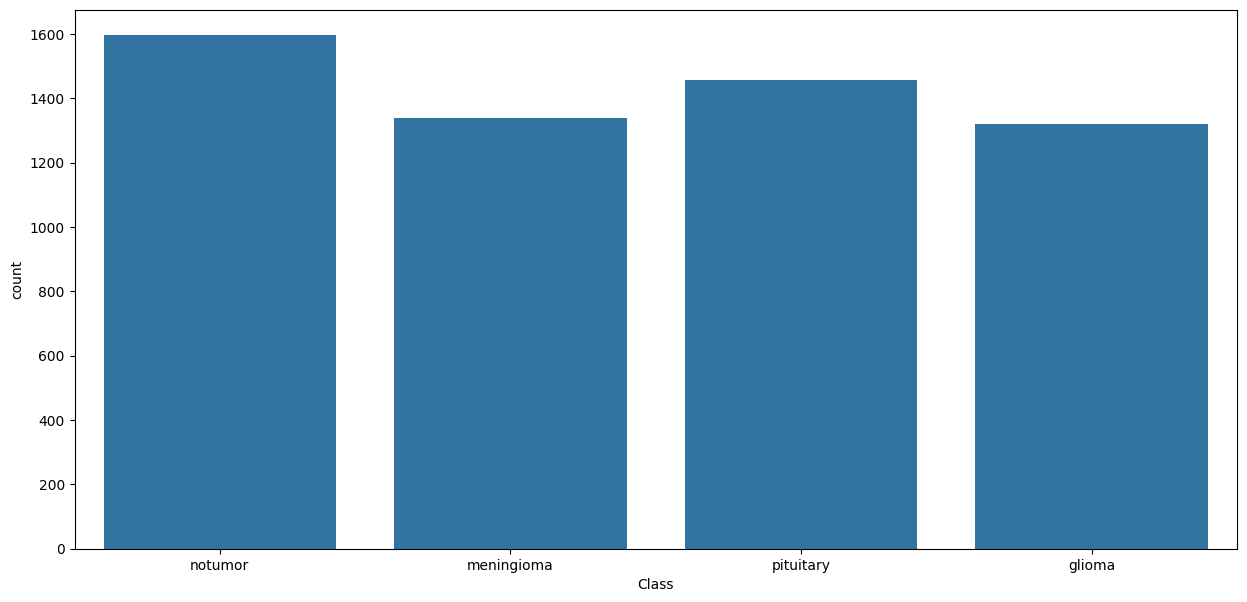

In [38]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

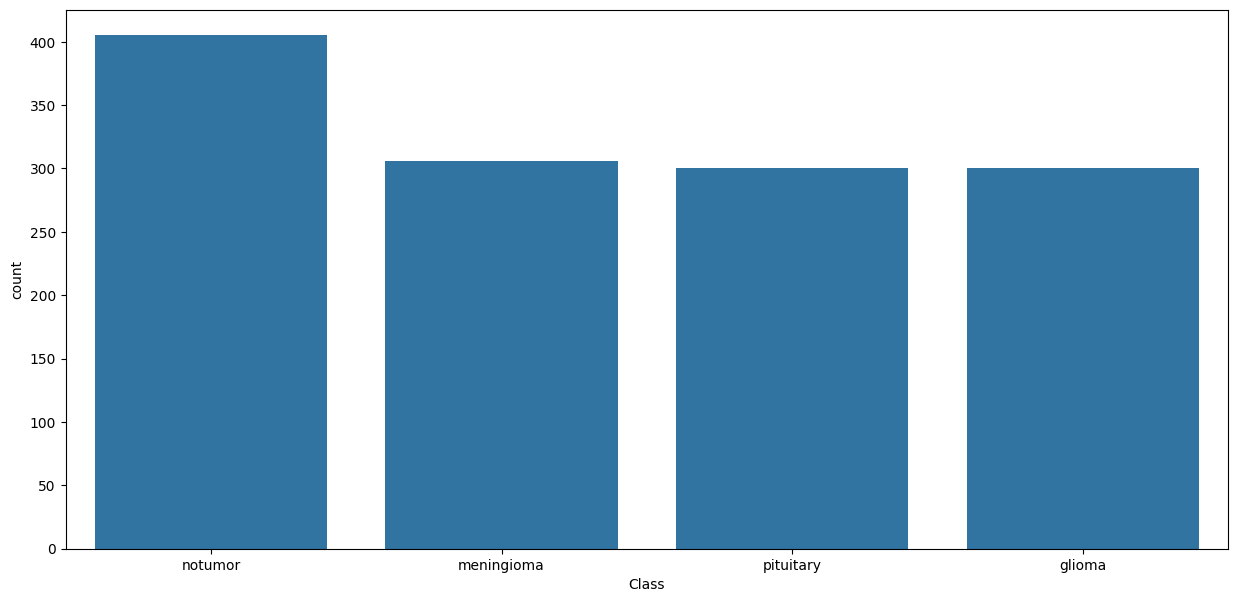

In [39]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [42]:
valid_df

,Class Path,Class
936,/content/Testing/pituitary/Te-pi_0083.jpg,pituitary
122,/content/Testing/notumor/Te-no_0384.jpg,notumor
852,/content/Testing/pituitary/Te-pi_0154.jpg,pituitary
1272,/content/Testing/glioma/Te-gl_0079.jpg,glioma
1014,/content/Testing/glioma/Te-gl_0174.jpg,glioma
...,...,...
241,/content/Testing/notumor/Te-no_0244.jpg,notumor
55,/content/Testing/notumor/Te-no_0282.jpg,notumor
705,/content/Testing/meningioma/Te-me_0050.jpg,meningioma
720,/content/Testing/pituitary/Te-pi_0274.jpg,pituitary


In [43]:
ts_df

,Class Path,Class
854,/content/Testing/pituitary/Te-pi_0249.jpg,pituitary
101,/content/Testing/notumor/Te-no_0270.jpg,notumor
580,/content/Testing/meningioma/Te-me_0211.jpg,meningioma
947,/content/Testing/pituitary/Te-pi_0025.jpg,pituitary
1143,/content/Testing/glioma/Te-gl_0093.jpg,glioma
...,...,...
673,/content/Testing/meningioma/Te-meTr_0007.jpg,meningioma
221,/content/Testing/notumor/Te-no_0041.jpg,notumor
91,/content/Testing/notumor/Te-no_0089.jpg,notumor
1098,/content/Testing/glioma/Te-gl_0247.jpg,glioma


In [44]:
# Default: 32
batch_size = 64

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [45]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


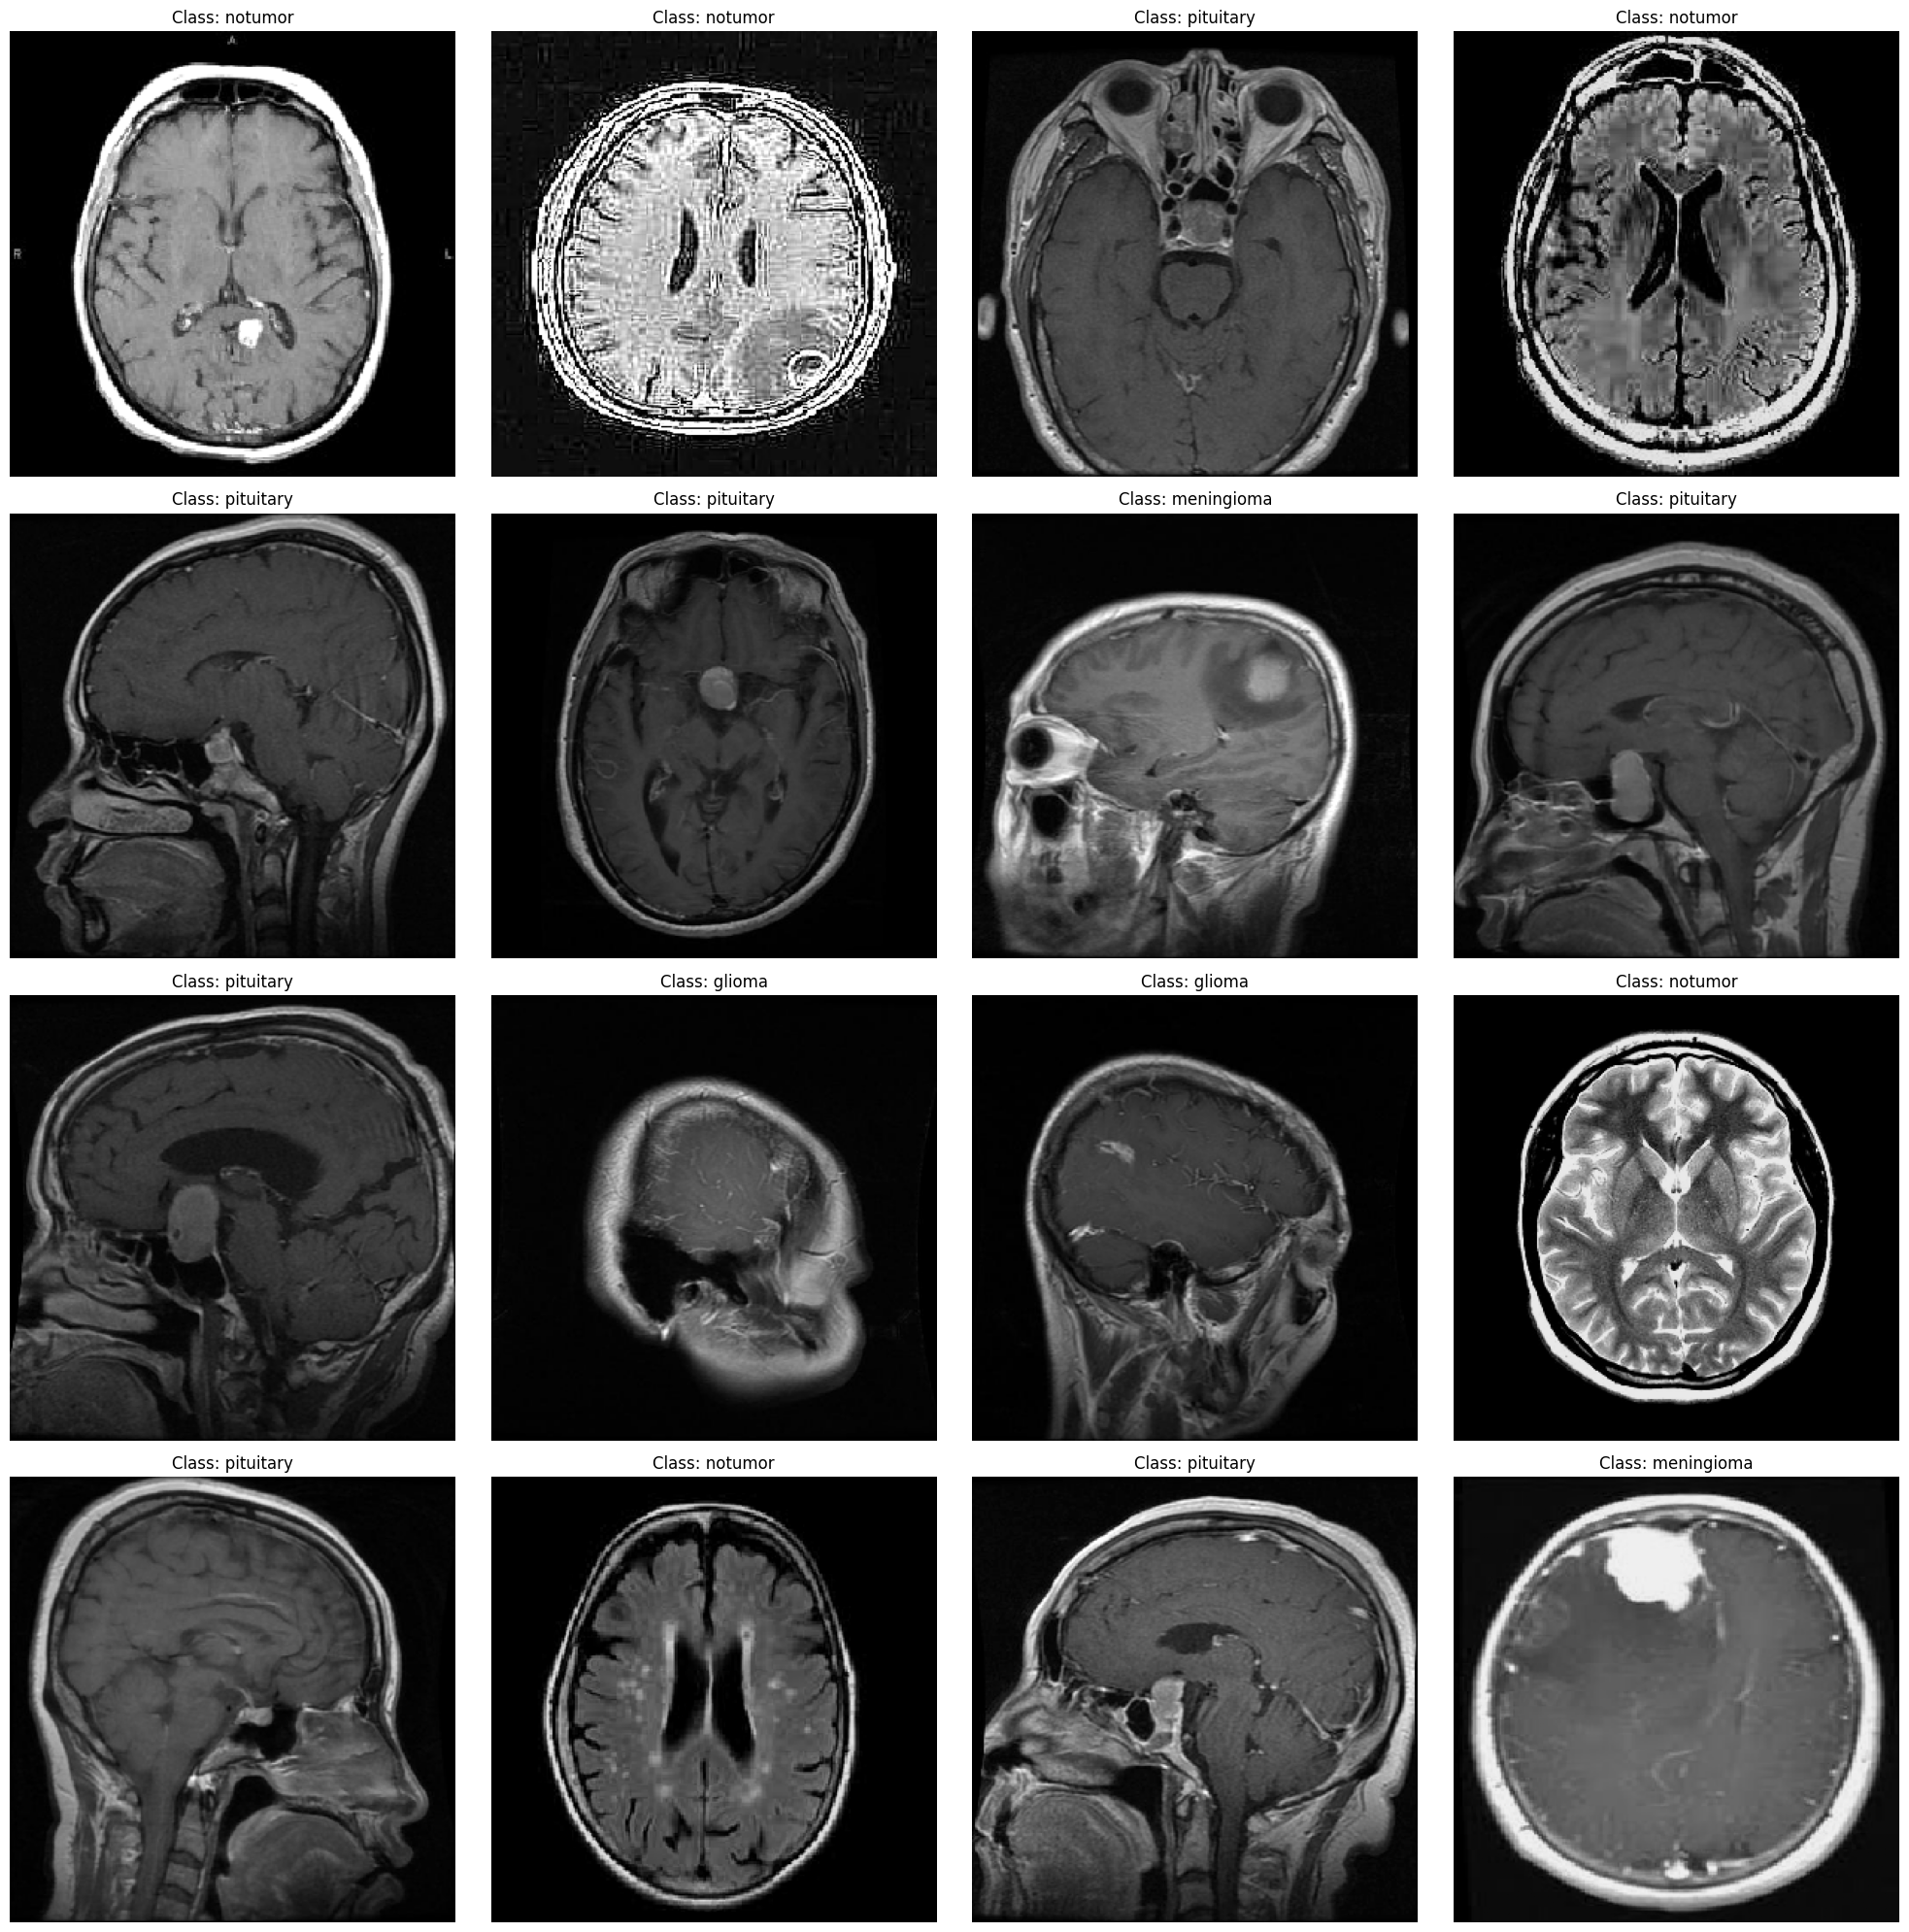

In [46]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [48]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])

In [49]:
# Default: 5 epoches
# 10 epochs tried
hist = model.fit(tr_gen, epochs=7, validation_data=valid_gen)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.7346 - loss: 0.8168 - precision: 0.7988 - recall: 0.6245 - val_accuracy: 0.8870 - val_loss: 0.2995 - val_precision: 0.9101 - val_recall: 0.8809
Epoch 2/7
90/90 ━━━━━━━━━━━━━━━━━━━━ 67s 714ms/step - accuracy: 0.9787 - loss: 0.0658 - precision: 0.9791 - recall: 0.9761 - val_accuracy: 0.9496 - val_loss: 0.1157 - val_precision: 0.9496 - val_recall: 0.9496
Epoch 3/7
90/90 ━━━━━━━━━━━━━━━━━━━━ 66s 709ms/step - accuracy: 0.9944 - loss: 0.0159 - precision: 0.9951 - recall: 0.9944 - val_accuracy: 0.9374 - val_loss: 0.2029 - val_precision: 0.9372 - val_recall: 0.9344
Epoch 4/7
90/90 ━━━━━━━━━━━━━━━━━━━━ 66s 709ms/step - accuracy: 0.9974 - loss: 0.0072 - precision: 0.9975 - recall: 0.9972 - val_accuracy: 0.9527 - val_loss: 0.1474 - val_precision: 0.9527 - val_recall: 0.9527
Epoch 5/7
90/90 ━━━━━━━━━━━━━━━━━━━━ 66s 710ms/step - accuracy: 0.9962 - loss: 0.0147 - precision: 0.9962 - recall: 0.9959 - val_accuracy: 0.9771 - val_loss: 0.1002 - val_p

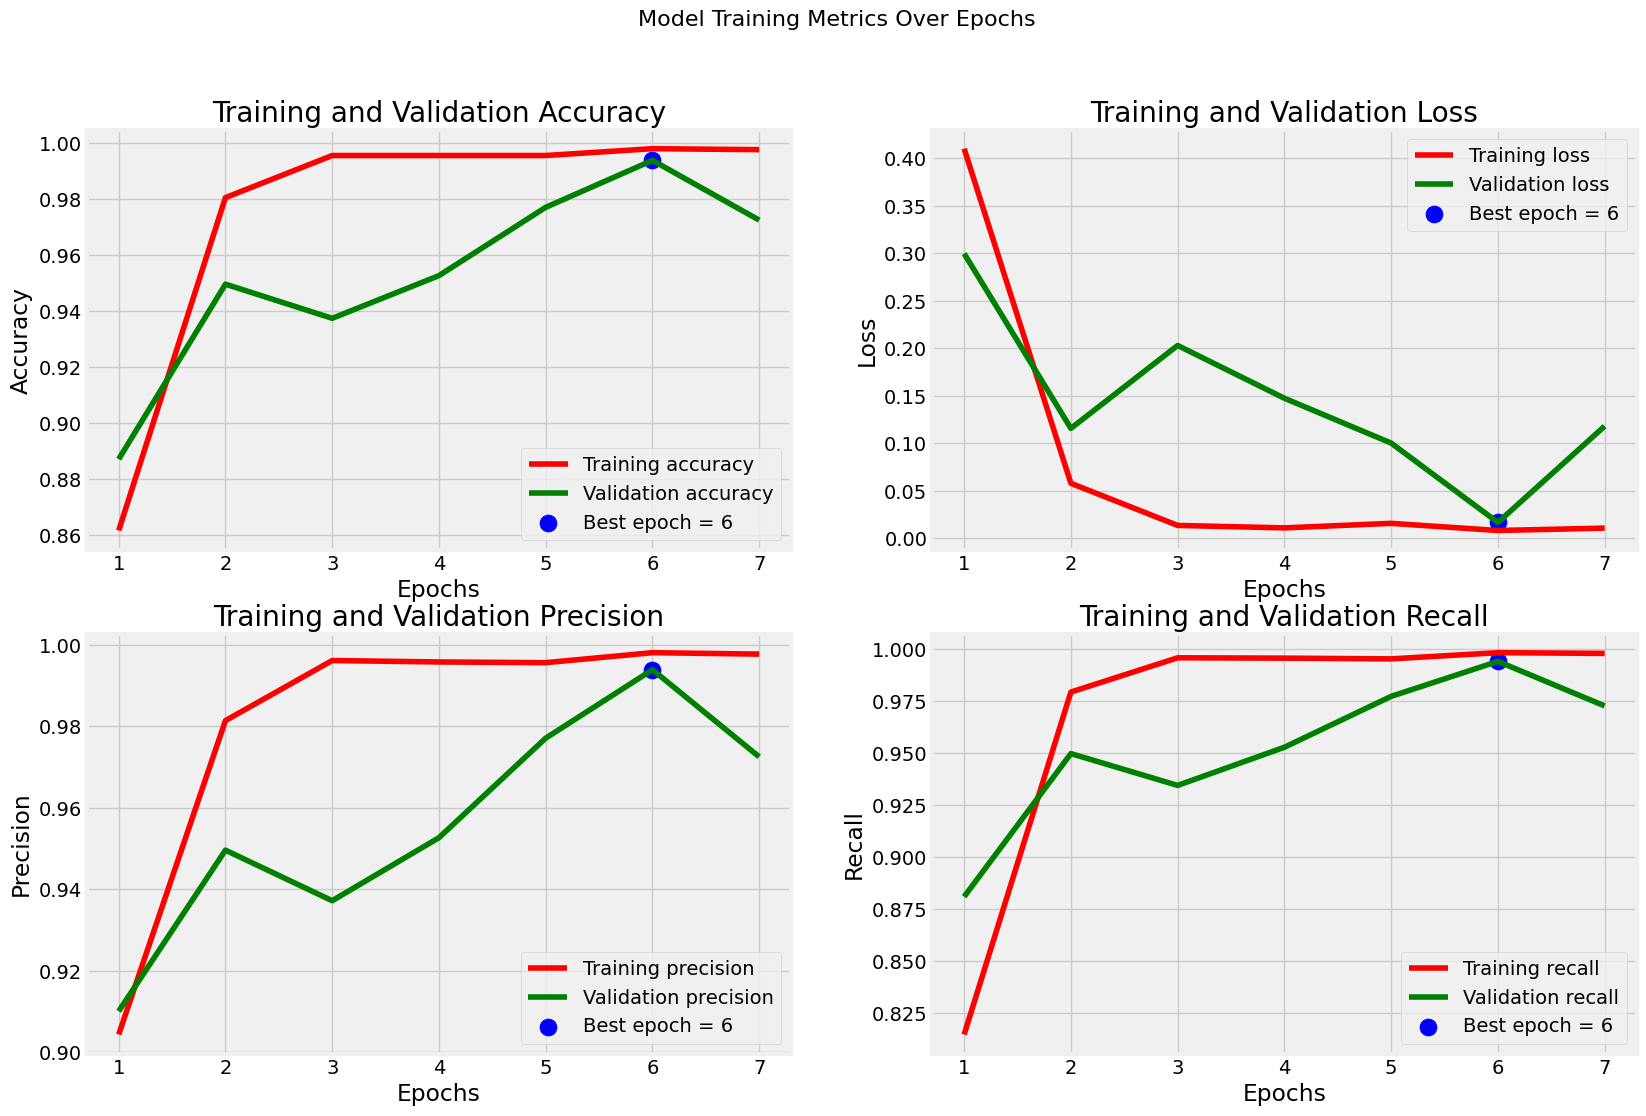

In [50]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [51]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - accuracy: 0.9891 - loss: 0.0365 - precision: 0.9891 - recall: 0.9886
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.9687 - loss: 0.1280 - precision: 0.9687 - recall: 0.9687
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9306 - loss: 0.2049 - precision: 0.9306 - recall: 0.9306 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9542 - loss: 0.1473 - precision: 0.9542 - recall: 0.9542
Train Accuracy: 98.74%
Train Loss: 0.0407


Validation Accuracy: 96.64%
Validation Loss: 0.1315


Test Accuracy: 96.19%
Test Loss: 0.1734


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


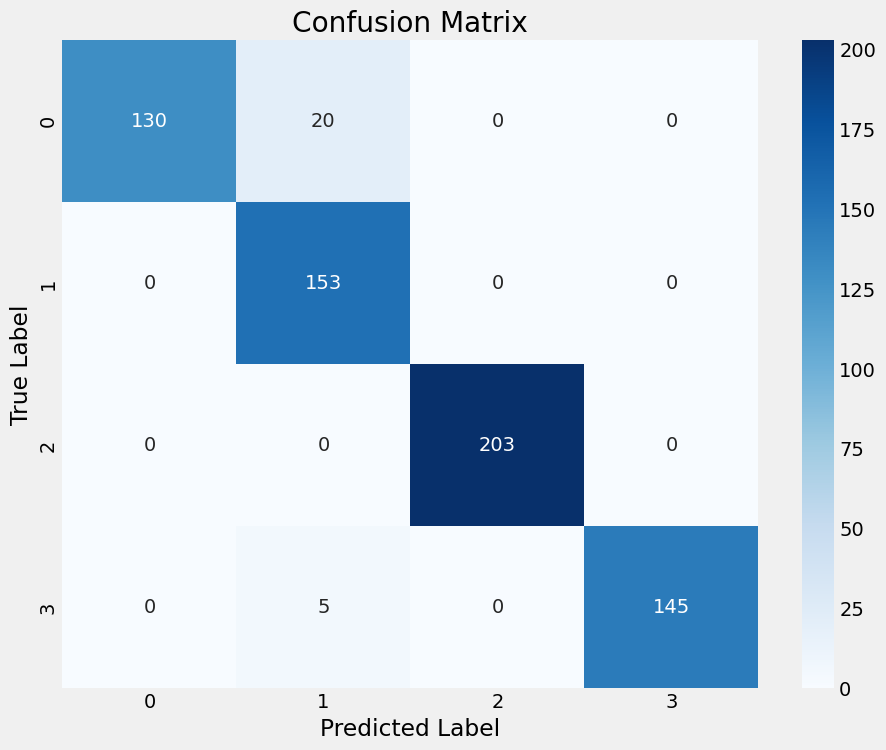

In [52]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


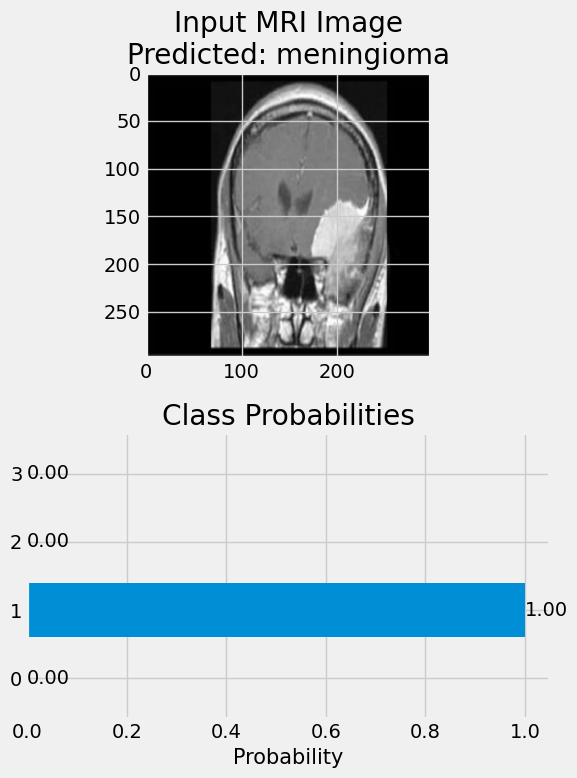


Predicted tumor type: meningioma


In [54]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


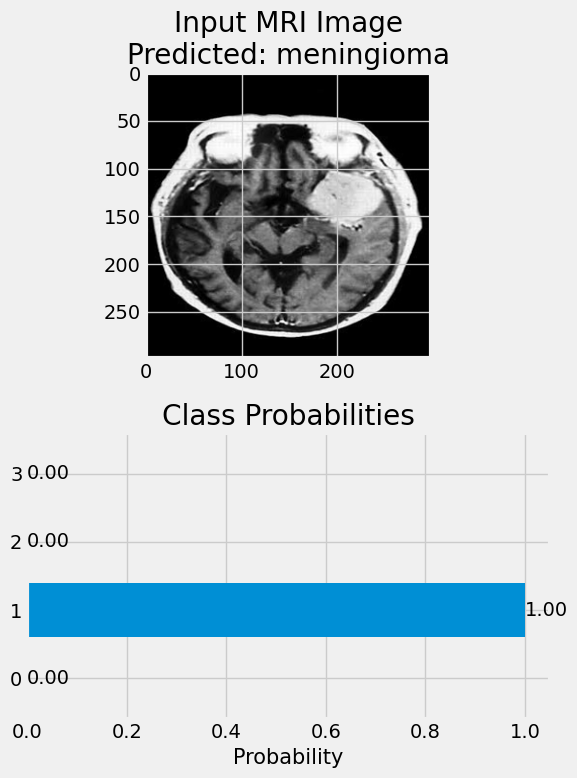


Predicted tumor type: meningioma


In [55]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


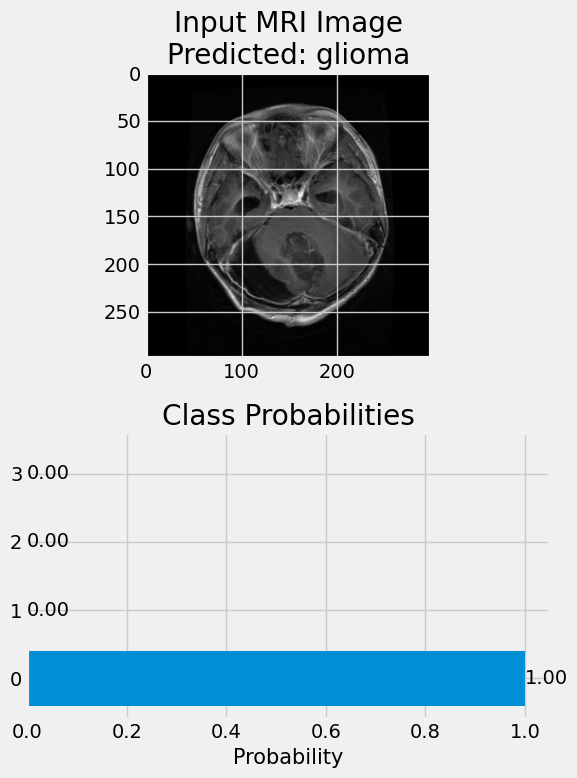


Predicted tumor type: glioma


In [56]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [57]:
model.save_weights("xception_model.weights.h5")

In [58]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [59]:
# Defaut batch size: 16
batch_size = 32

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [60]:
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Learning rate reduction callback: reduces learning rate if validation loss plateaus
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    patience=3,                   # Number of epochs with no improvement before reducing
    factor=0.5,                   # Factor to reduce the learning rate by
    min_lr=0.00001                # Minimum learning rate
)

# Early stopping callback: stops training if validation loss doesn’t improve
early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitor validation loss
    patience=5,                   # Number of epochs with no improvement before stopping
    restore_best_weights=True     # Restores model weights to best epoch
)

callbacks = [lr_reduction, early_stopping]


In [61]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# history = cnn_model.fit(tr_gen, epochs=7, validation_data=valid_gen)
history = cnn_model.fit(tr_gen, validation_data=valid_gen, epochs=50, callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 124s 533ms/step - accuracy: 0.5275 - loss: 2.8405 - precision_1: 0.6612 - recall_1: 0.3248 - val_accuracy: 0.7359 - val_loss: 1.1031 - val_precision_1: 0.7688 - val_recall_1: 0.6855 - learning_rate: 0.0010
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 345ms/step - accuracy: 0.7814 - loss: 0.9592 - precision_1: 0.8121 - recall_1: 0.7358 - val_accuracy: 0.7969 - val_loss: 0.8538 - val_precision_1: 0.8322 - val_recall_1: 0.7420 - learning_rate: 0.0010
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 62s 344ms/step - accuracy: 0.8199 - loss: 0.6954 - precision_1: 0.8372 - recall_1: 0.7968 - val_accuracy: 0.8214 - val_loss: 0.6505 - val_precision_1: 0.8454 - val_recall_1: 0.8015 - learning_rate: 0.0010
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 62s 345ms/step - accuracy: 0.8697 - loss: 0.5208 - precision_1: 0.8825 - recall_1: 0.8536 - val_accuracy: 0.8489 - val_loss: 0.5309 - val_precision_1: 0.8574 - val_recall_1: 0.8351 - learning_rate: 0.0010
Epoch 5/50
179/179 ━━━━━━━━━━━

In [64]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1', 'learning_rate'])

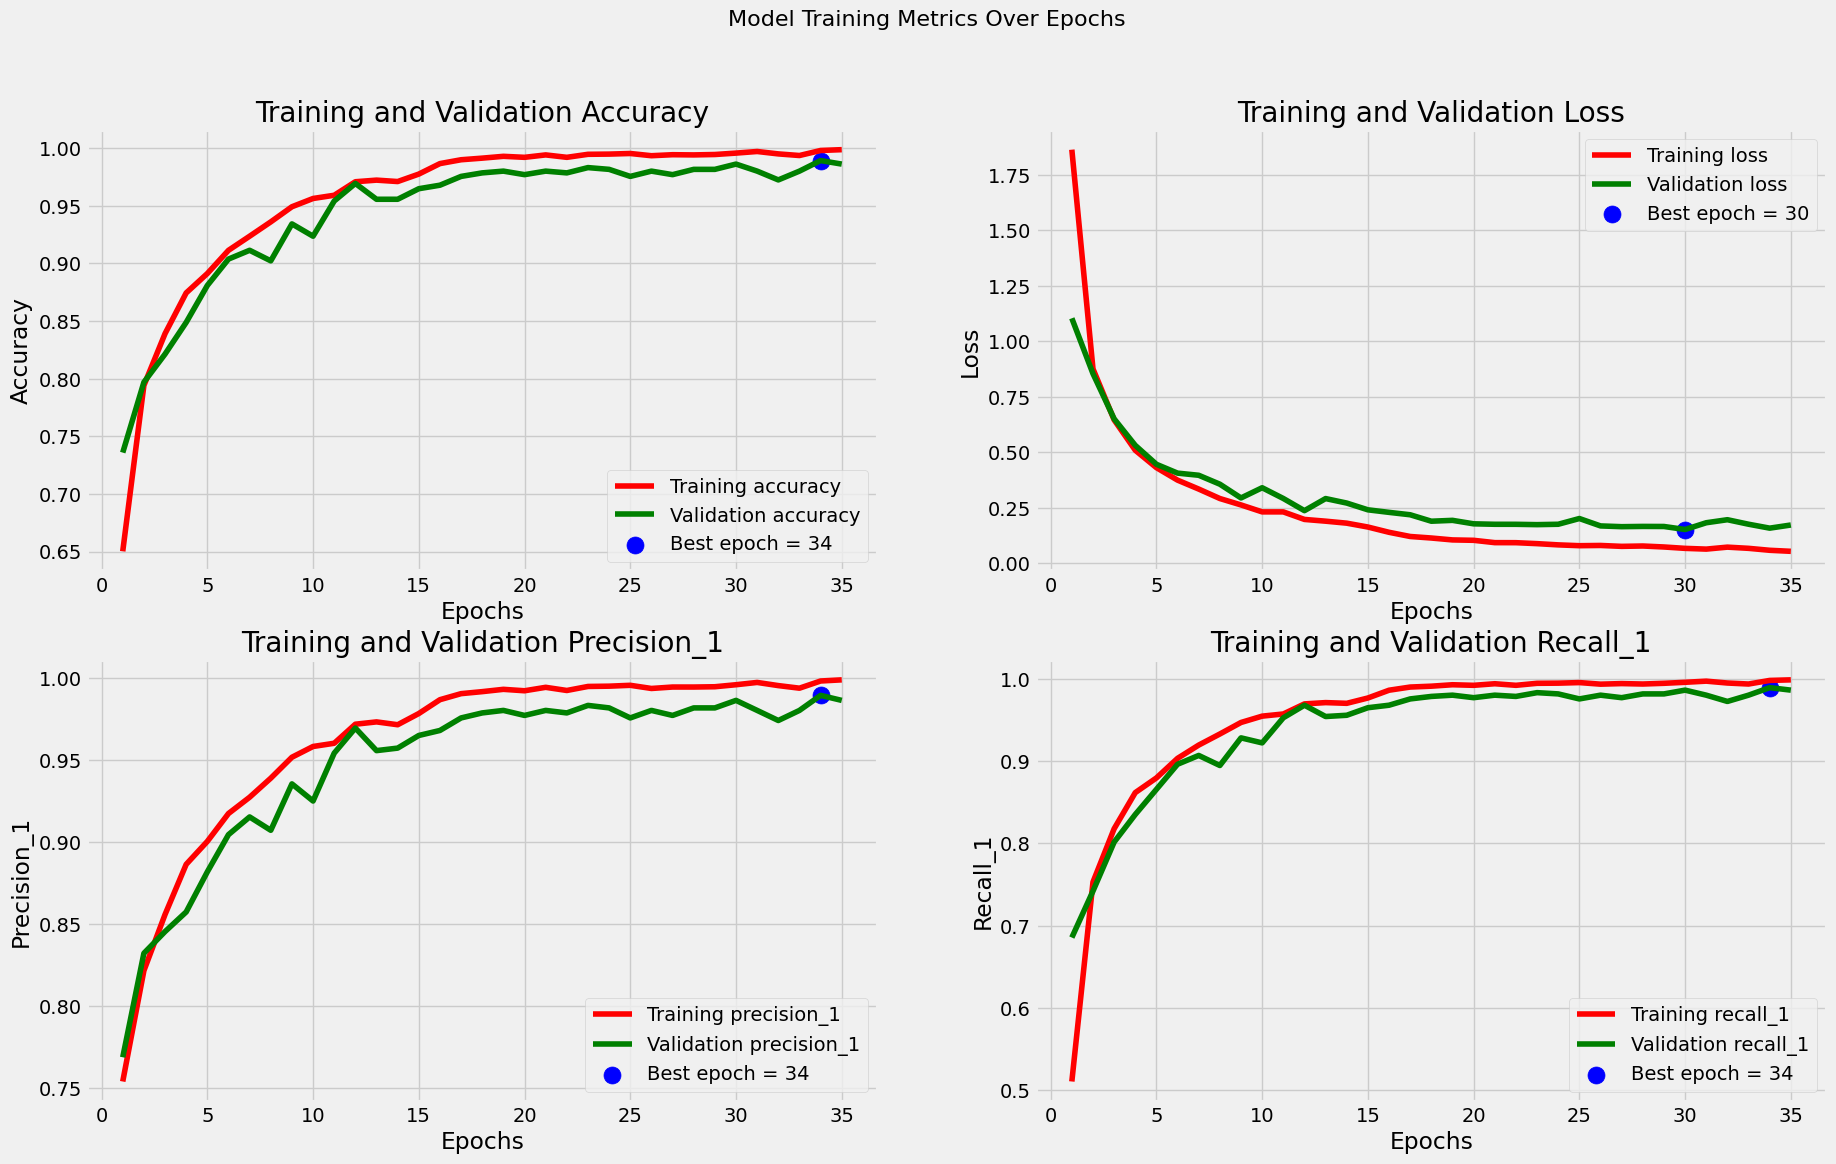

In [65]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [66]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 136ms/step - accuracy: 0.9997 - loss: 0.0565 - precision_1: 0.9997 - recall_1: 0.9997
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9903 - loss: 0.1168 - precision_1: 0.9903 - recall_1: 0.9903
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9826 - loss: 0.0757 - precision_1: 0.9826 - recall_1: 0.9826

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9847 - loss: 0.1177 - precision_1: 0.9847 - recall_1: 0.9847
Train Accuracy: 99.96%
Train Loss: 0.0564


Validation Accuracy: 98.32%
Validation Loss: 0.1613


Test Accuracy: 98.32%
Test Loss: 0.1477


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


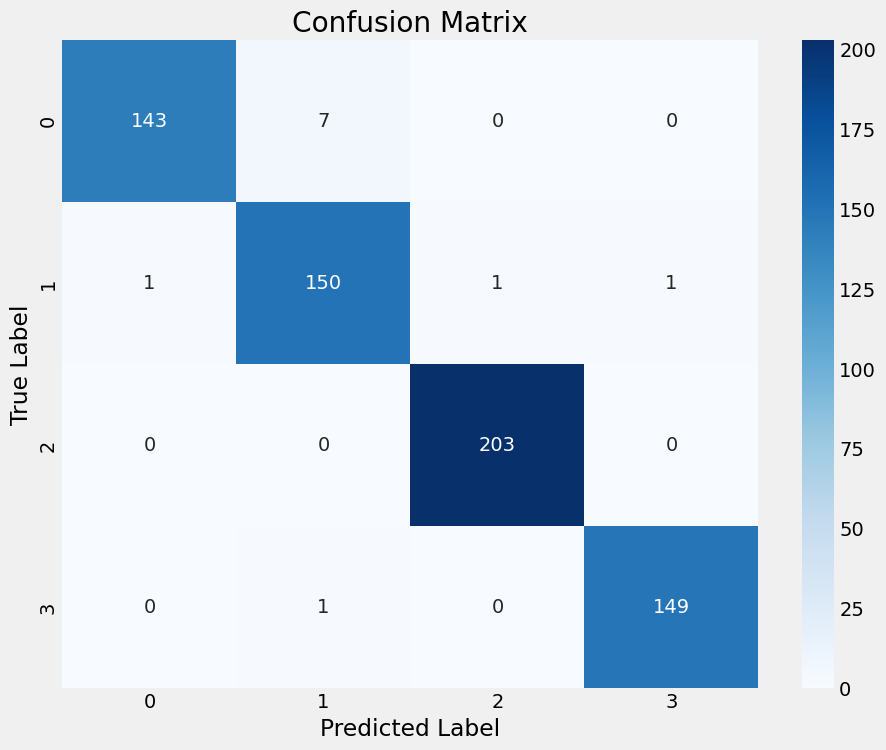

In [67]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.95      0.98      0.96       153
           2       1.00      1.00      1.00       203
           3       0.99      0.99      0.99       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [68]:
cnn_model.save("cnn_model.h5")

# Streamlit Web App




In [43]:
! pip install streamlit pyngrok python-dotenv openai

In [80]:
pip install --upgrade openai

In [81]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [82]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [83]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [155]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
from openai import OpenAI
import openai
from google.colab import files
import base64
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

client = OpenAI()
openai.api_key = os.getenv("OPENAI_API_KEY")

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_chat_response(user_query, saliency_map_path, predicted_class, confidence):
    """
    Generate a response from the LLM based on the user's query and context.

    Args:
        user_query (str): The question or input from the user.
        saliency_map_path (str): Path to the saliency map image.
        predicted_class (str): The model's predicted class for the MRI scan.
        confidence (float): Confidence score of the model's prediction.

    Returns:
        str: The LLM-generated response.
    """
    chat_prompt = f"""You are a medical expert assisting with MRI scans.
    A saliency map has been generated for a brain MRI scan.
    The scan is classified as '{predicted_class}' with {confidence * 100:.2f}% confidence.

    The user asked: {user_query}.
    Respond to their question using the provided information, referencing the saliency map where applicable."""

    try:
        model = genai.GenerativeModel(model_name="gemini-1.5-flash")
        llm_response = model.generate_content([chat_prompt, PIL.Image.open(saliency_map_path)])
        return llm_response.text
    except Exception as e:
        return "Sorry, I could not generate a response. Please try again."

# Define available multimodal LLMs and their APIs
available_llms = {
    "Gemini-1.5-Flash": {
        "type": "genai",
        "model_name": "gemini-1.5-flash"
    },
    "OpenAI 4.0-Mini": {
        "type": "openai",
        "model_name": "gpt-4-mini"
    }
}

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

def generate_model_response(llm_choice, img_path, predicted_class, confidence):
    """
    Generate an explanation using the selected LLM.

    Args:
        llm_choice (str): Selected LLM (e.g., 'Gemini-1.5-Flash', 'OpenAI 4.0-Mini').
        img_path (str): Path to the saliency map image (if not using `img_url`).
        predicted_class (str): Predicted class of the MRI scan.
        confidence (float): Confidence score of the prediction.

    Returns:
        str: The generated explanation from the selected LLM.
    """

    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{predicted_class}' with a confidence of {confidence * 100}%.

    In your response:
      - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
      in light cyan, those are the regions where the model is focusing on.
      - Explain possible reasons why the model made the prediction it did.
      - DO NOT mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
      in your explanation.
      - Keep your explanation to 4 sentences max.

      Let's think step by step about this. Verify step by step.
    """

    try:
        if llm_choice == "Gemini-1.5-Flash":
            # Use Google GenAI API (if applicable)
            genai_model = genai.GenerativeModel(model_name="gemini-1.5-flash")
            img = PIL.Image.open(img_path)
            response = genai_model.generate_content([prompt, img])
            return response.text

        elif llm_choice == "OpenAI 4.0-Mini":
            # Get the base64-encoded string of the image
            img_b64_str = encode_image_to_base64(img_path)

            # Construct the data URL format
            img_type = "image/jpeg"  # Adjust the MIME type if needed (e.g., "image/png" for PNG images)
            img_data_url = f"data:{img_type};base64,{img_b64_str}"

            # Make the request to OpenAI API using the correct client method
            response = client.chat.completions.create(
                model="gpt-4o-mini",  # Use the appropriate OpenAI model
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": prompt},
                            {
                                "type": "image_url",
                                "image_url": {"url": img_data_url},  # Using the base64 image
                            },
                        ],
                    }
                ],
            )
            return response.choices[0].message.content

        else:
            return "Selected LLM is not supported."

    except Exception as e:
        return f"Error generating explanation: {e}"



def generate_explanation(img_path, model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors
  as either glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
    in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - DO NOT mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
    in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)
  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text



def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img


def load_xception_model(model_path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# UI for selecting LLM
st.sidebar.header("Select Multimodal LLM")
selected_llm = st.sidebar.selectbox(
    "Choose the LLM to use for generating explanations:",
    options=list(available_llms.keys())
)

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  # st.write(f"Predicted Class: {result}")
  # st.write("Predictions:")
  # for label, prob in zip(labels, prediction[0]):
  #   st.write(f"{label}: {prob:.4f}")


  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_column_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-content: space-between; align-items: center;">
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Predictions</h3>
            <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
              {result}
            </p>
          </div>
          <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
            <p style="font-size: 35px; font-weight: 800; color: #2196F3; margin: 0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)


  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  # explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  # st.write("## Explanation")
  # st.write(explanation)

  # Generate explanation
  st.subheader("Explanation")
  explanation = generate_model_response(
    llm_choice=selected_llm,
    img_path=saliency_map_path,
    predicted_class=result,
    confidence=prediction[0][class_index]
  )
  st.write(f"### Explanation using {selected_llm}")
  st.write(explanation)

  # Chat interface
  st.subheader("Chat with the Multimodal LLM")
  if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

  # Display chat history
  for chat in st.session_state.chat_history:
    with st.chat_message(chat["role"]):
      st.markdown(chat["message"])

  # Input box for user query
  user_query = st.chat_input("Ask a question about the saliency map:")
  if user_query:
    # Append user query to chat history
    st.session_state.chat_history.append({"role": "user", "message": user_query})
    with st.chat_message("user"):
      st.markdown(user_query)

    # Generate LLM response using the function
    response_text = generate_chat_response(user_query, saliency_map_path, result, prediction[0][class_index])

    # Append LLM response to chat history
    st.session_state.chat_history.append({"role": "assistant", "message": response_text})
    with st.chat_message("assistant"):
      st.markdown(response_text)



Overwriting app.py


In [157]:
thread = Thread(target=run_streamlit)
thread.start()

In [158]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://5e40-34-124-164-26.ngrok-free.app" -> "http://localhost:8501"


In [156]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://74e7-34-124-164-26.ngrok-free.app -> http://localhost:8501
